# Loan Prediction – Model Evaluation and Selection

This notebook evaluates the performance of trained machine learning models
using appropriate classification metrics. The best-performing model is
selected based on quantitative results.

## 1. Import Libraries and Load Cleaned Dataset

The cleaned dataset is loaded to ensure consistency with the preprocessing
and modeling stages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

In [2]:
# Load cleaned dataset
df = pd.read_csv('../data/loan_data_cleaned.csv')

# Encode categorical variables
le = LabelEncoder()
categorical_cols = [
    'Gender', 'Married', 'Dependents',
    'Education', 'Self_Employed', 'Property_Area'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

# Feature-target split
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status']


## 2. Feature Selection and Train-Test Split

The same feature selection strategy used during model training
is applied to maintain consistency.

In [3]:
selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

## 3. Logistic Regression Evaluation

In [4]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.7886178861788617

Confusion Matrix:
 [[18 25]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



c:\Users\neeli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 4. Decision Tree Classifier Evaluation

In [5]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.6991869918699187

Confusion Matrix:
 [[23 20]
 [17 63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.53      0.55        43
           1       0.76      0.79      0.77        80

    accuracy                           0.70       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.69      0.70      0.70       123



## 5. ROC–AUC Curve Comparison

ROC–AUC is used to evaluate the classification performance of both models
independent of class imbalance.

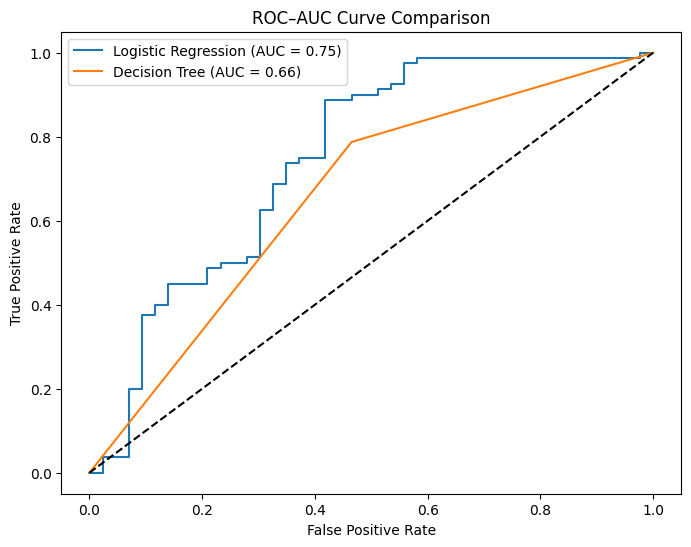

In [6]:
lr_auc = roc_auc_score(y_test, y_prob_lr)
dt_auc = roc_auc_score(y_test, y_prob_dt)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC–AUC Curve Comparison')
plt.legend()
plt.show()

## Conclusion and Final Model Selection

The performance of Logistic Regression and Decision Tree models was evaluated
using accuracy, confusion matrix, classification report, and ROC–AUC score.

The ROC–AUC analysis shows that Logistic Regression achieved an AUC of 0.75,
while the Decision Tree achieved an AUC of 0.66. Since Logistic Regression
demonstrates a higher AUC value and better discrimination between approved
and rejected loan applications, it is selected as the final model.

Additionally, Logistic Regression offers better generalization and model
interpretability, making it more suitable for the loan approval prediction task.
An AUC value of 0.75 indicates that the model has a good ability to distinguish
between approved and rejected loan applications.